In [1]:
import requests
from urllib import urlencode # This module provides a high-level interface for fetching data across the World Wide Web
from bs4 import BeautifulSoup
import re
import numpy as np
from time import sleep
from nltk.tokenize import sent_tokenize, word_tokenize

links=[]

def get_url():
    
    """Get the main searching page url"""
    base = 'https://www.indeed.com/jobs?'
    q = 'data scientist'

    for i in np.linspace(10, 50, 5, dtype= 'int'):
        page = i
        url = base + urlencode({'q':q}) + '&' + urlencode({'start':page})
        print url
        
        sleep(10) # added delay to ensure indeed server does not reject url requests
        
        """Scraping job title href links from the main searched page """
        try:
            r = requests.get(url)
        except requests.exceptions.ConnectionError: # solves for indeed server rejecting url requests
            r.status_code = "Connection refused"
            
        soup =  BeautifulSoup(r.text, 'html.parser') # parse into html
        results = soup.find_all('a', attrs={'data-tn-element':'jobTitle'})

        base_2 = 'https://www.indeed.com'

        for i in results:
            links.append(base_2 + i['href'])

    return links

In [2]:
x = get_url()

https://www.indeed.com/jobs?q=data+scientist&start=10
https://www.indeed.com/jobs?q=data+scientist&start=20
https://www.indeed.com/jobs?q=data+scientist&start=30
https://www.indeed.com/jobs?q=data+scientist&start=40
https://www.indeed.com/jobs?q=data+scientist&start=50


In [3]:
print len(links)

80


In [6]:
x[:5]

[u'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AMJeVuk4ECd5K_1LfpdW7JxefdFJh_RJqhU5XMhpZ8EfxDLCxSSPXlPWaXB-ucFdSStkipA3z6gDsg5rtwTRhhksiVki51wYLTiV4jgfZrYuN5dPa3-ovFYZ_9udK7GXShP-4m9E0bUIpVv1tbw1EIQhy-tdnXaYfV0akzQs94qnYncFVbf1uxDQqaTDcJYsEo5e2t8agmbTNxnca_BvUy18mXZhQjdwUaJgawRtRGSj9B4ibHDxn1-XATISVr9Mg7wZE0VnPs5HQ_2Ser35ftC3VVSLaA7sps9KcjGEUa6UPBVM-1tdrSWRo53rZ1sNFwhcQAOpWWJFgG5_sE6V9e9wruu8gHe8zTOYDB5qnKaHzBSh7-ADHvWgxPAVhfzd9js6sW_CMKikOQlUEC2Nc0r1jYUmqCbrq9OTxGxDgayy5lbwGXRIBYOkqPF9FNydl04veZ_HeUVkg8vkXvnub9EdMM39F_aaj6rdsxQ1dEV1BqBUPCLnHAEp21nKtVYzha5lwLeadbchIHb-QS-jT05JGJQp0qdZSS_80B0fZtvrE58mxn3AW2SsvuaqCXnMZeL1U3S03-C17IeX6Sy7ixrFAflSWE7lWLi7yLRxK40_RX2H3M3CXU&vjs=3&p=1&sk=&fvj=0',
 u'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0D6N_YvCEOtyrASauy5EjKuXlD4b0DhlGZ_7VkOh0nBFnzUO0Ba-o-77q0n_EiIkpdHE0NYZT342JB8BUaCeAwlNrX_5NH7Lb5oPBh6Zb_RybELKM3xrmqEd63Nhxwz6Me2BG4dGMHmNNuAOz959h-DHX1yJcwl3kpkQx_aI_7rjcjEEMZw27qE5W_xbcOkw-aH9GeLWWbw7PHiF300oLt5hJvpC5oiM86hXz30sjmlcWI

In [7]:
"""Scrape keywords of each job posting page and store them in a list"""

import itertools
from nltk.stem import WordNetLemmatizer
import pandas as pd

lem = WordNetLemmatizer()

list_strings=[]
word=[]
words=[]
words_2=[]
words_3=[]
lem_words=[]

def get_keywords(link):
    
    for url in link:
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
#         print soup.find('a', attrs={'data-tn-element':'jobTitle'}).text
        result = soup.find_all('ul') # get a list of bullet points with tags        
         
        for i in result: # REMOVE all tags: get a list of bullet points as strings
            for j in i.find_all('li'):
                list_strings.append(j.text)                
        
        for i in list_strings: # tokenize strings into individual words
            word.append(word_tokenize(i))
            
        words = list(itertools.chain.from_iterable(word)) # join all lists of tokenized words
        
        pattern = re.compile(r'[^a-zA-Z+]') # clean up words, REMOVE all that's not a word

        for i in words:
            words_2.append(pattern.sub(r'', i))        
        words_3 = filter(None, words_2)        
        
    for i,j in enumerate(words_3):
        k = lem.lemmatize(j, pos='v')
        k = k.lower()
        lem_words.append(k.decode('unicode_escape').encode('ascii', 'ignore'))
    
#     df = pd.DataFrame(lem_words)
#     df.to_csv('skills.csv') # save cleaned up words into csv file

    return lem_words

In [8]:
get_keywords(links)

['the',
 'leader',
 'would',
 'have',
 'to',
 'strike',
 'a',
 'balance',
 'between',
 'be',
 'able',
 'to',
 'guide',
 'and',
 'influence',
 'the',
 'think',
 'and',
 'vision',
 'of',
 'the',
 'overall',
 'team',
 'while',
 'at',
 'the',
 'same',
 'time',
 'be',
 'extremely',
 'comfortable',
 'do',
 'actual',
 'handson',
 'analyse',
 'use',
 'tool',
 'package',
 'such',
 'as',
 'sql',
 'r',
 'python',
 'tableau',
 'etc',
 'this',
 'leader',
 'need',
 'to',
 'possess',
 'not',
 'only',
 'super',
 'strong',
 'technical',
 'skills',
 'to',
 'turn',
 'big',
 'data',
 'in',
 'teradata',
 'and',
 'hadoop',
 'into',
 'actionable',
 'insights',
 'but',
 'also',
 'big',
 'picture',
 'think',
 'to',
 'connect',
 'the',
 'dot',
 'and',
 'evaluate',
 'how',
 'the',
 'insights',
 'impact',
 'ebays',
 'ecosystem',
 'in',
 'addition',
 'to',
 'deliver',
 'insights',
 'on',
 'exist',
 'product',
 'tech',
 'initiatives',
 'successful',
 'leaders',
 'will',
 'come',
 'up',
 'with',
 'innovative',
 'pro

In [9]:
len(lem_words)

15132002

In [10]:
lem_words[:50]

['the',
 'leader',
 'would',
 'have',
 'to',
 'strike',
 'a',
 'balance',
 'between',
 'be',
 'able',
 'to',
 'guide',
 'and',
 'influence',
 'the',
 'think',
 'and',
 'vision',
 'of',
 'the',
 'overall',
 'team',
 'while',
 'at',
 'the',
 'same',
 'time',
 'be',
 'extremely',
 'comfortable',
 'do',
 'actual',
 'handson',
 'analyse',
 'use',
 'tool',
 'package',
 'such',
 'as',
 'sql',
 'r',
 'python',
 'tableau',
 'etc',
 'this',
 'leader',
 'need',
 'to',
 'possess']

In [11]:
"""Update frequency of each skills and store them in a dictionary"""

key_dict = {'api':0, 'sql':0, 'excel':0, 'r':0, 'python':0, 'tableau':0, 'sas':0, 'spss':0, 'hadoop':0, 'java':0, 'javascript':0, 'matlab':0, 'c++':0, 'mysql':0, 'ruby':0, 'django':0, 'nlp':0, 'spark':0, 'hive':0, 
           'nosql':0, 'scala':0}

def skills(words):
     
    for i in words:
        for j,k in key_dict.items():
            if i == j:
                key_dict[j] +=1
                
    return key_dict

In [12]:
skills(lem_words)

{'api': 812,
 'c++': 6491,
 'django': 0,
 'excel': 12435,
 'hadoop': 49793,
 'hive': 16017,
 'java': 29433,
 'javascript': 2473,
 'matlab': 9010,
 'mysql': 5875,
 'nlp': 15004,
 'nosql': 12463,
 'python': 96257,
 'r': 70538,
 'ruby': 0,
 'sas': 15916,
 'scala': 13557,
 'spark': 40331,
 'spss': 6816,
 'sql': 62733,
 'tableau': 29426}

In [13]:
"""Plot the dictionary of the skills in order of occurences"""

import matplotlib.pyplot as plt
%matplotlib inline

def bar(dictionary):
    y = sorted(key_dict.items(), key=lambda x: x[1], reverse=True)
    keys=[]
    values=[]
    for i,j in y:
        keys.append(i)
        values.append(j)
        
    plt.bar(range(len(keys)), values, tick_label=keys)
    
    return

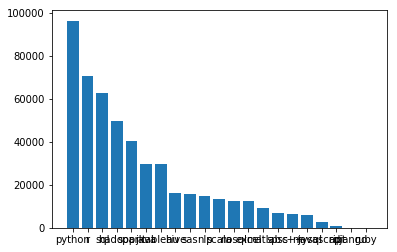

In [14]:
bar(key_dict)